In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:

df = pd.read_csv(r"merge_06.csv", parse_dates=["date"], index_col="date")
df = df.sort_index()
df.dropna(inplace=True)

In [3]:
df.index[-1]

Timestamp('2081-10-01 00:00:00')

In [4]:
df.columns

Index(['sales'], dtype='object')

In [5]:
# data visualization using plotly
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

df_sales = pd.read_csv(r"merge_06.csv")

df_sales.columns = ['date','sales']

df_sales[['Year', 'Month']] = df_sales['date'].str.split('-', expand=True)
df_sales['Year'] = df_sales['Year'].astype(int)
df_sales['Month'] = df_sales['Month'].astype(int)
nepali_months_fiscal_order = {
    4: "Shrawan", 5: "Bhadra", 6: "Asoj", 7: "Kartik",
    8: "Mangsir", 9: "Poush", 10: "Magh", 11: "Falgun",
    12: "Chaitra", 1: "Baishakh", 2: "Jestha", 3: "Ashadh"
}

df_sales['Month_Name'] = df_sales['Month'].map(nepali_months_fiscal_order)


df_sales['Fiscal_Year'] = df_sales.apply(lambda row: 
                                         f"{row['Year']}-{row['Year']+1}" if row['Month'] >= 4 
                                         else f"{row['Year']-1}-{row['Year']}", axis=1)

df_sales['Month_Order'] = df_sales['Month'].apply(lambda x: list(nepali_months_fiscal_order.keys()).index(x))

df_sales = df_sales.sort_values(by=['Fiscal_Year', 'Month_Order'])

fig = go.Figure()

fiscal_years = df_sales['Fiscal_Year'].unique()

for fy in fiscal_years:
    df_fy = df_sales[df_sales['Fiscal_Year'] == fy]
    fig.add_trace(go.Scatter(
        x=df_fy['Month_Name'], 
        y=df_fy['sales'], 
        mode='lines+markers',
        name=f'Fiscal Year {fy}',
        line=dict(shape='spline')  
    ))

fig.update_layout(
    title="Sales Trend by Fiscal Year",
    xaxis_title="Nepali Month",
    yaxis_title="Sales",
    xaxis=dict(categoryorder='array', categoryarray=list(nepali_months_fiscal_order.values())),
    template="plotly_dark",
    hovermode="x unified"
)

pyo.iplot(fig)


In [6]:
df.head(10)

,sales
date,
2077-04-01,5.325850e+08
2077-05-01,4.436915e+08
2077-06-01,1.849226e+09
2077-07-01,9.448690e+08
2077-08-01,1.003570e+09
2077-09-01,1.103430e+09
2077-10-01,1.012084e+09
2077-11-01,1.312970e+09
2077-12-01,1.652121e+09


ACF values are : 
0 1.0
1 0.2699470238684541
2 -0.15741541260729006
3 -0.1636189419084674
4 -0.1813953363925275
5 -0.044217754360985725
6 0.017300155483848164
7 0.04127149798149671
8 -0.13045749771182744
9 -0.210318216032559
10 -0.12621486876545468
11 0.2836435800709463
12 0.6036070053529972
13 0.2406302745565322
14 -0.1499195723174968
15 -0.24740758627177753
16 -0.17389745564537945
17 -0.0834523875007506
18 -0.006820526587933098
19 0.008638106852660685
20 -0.02385158501217013
21 -0.2691321561348609
22 -0.16180749846242534
23 0.22099851663437786
PACF values are : 
0 1.0
1 0.27494604282898094
2 -0.25849170841030905
3 -0.052702710292975095
4 -0.18931364289901437
5 0.022550927285834278
6 -0.06762777919611397
7 0.02225071325252756
8 -0.2583960736121418
9 -0.16329951585308933
10 -0.17207458742057105
11 0.4314076374897119
12 0.6572705092014658
13 0.3282073642295518
14 -0.27439514049512465
15 -0.6821062985169938
16 -0.7199773441923117
17 -0.03041171969517845
18 1.9034915987404193
19 -0.534380

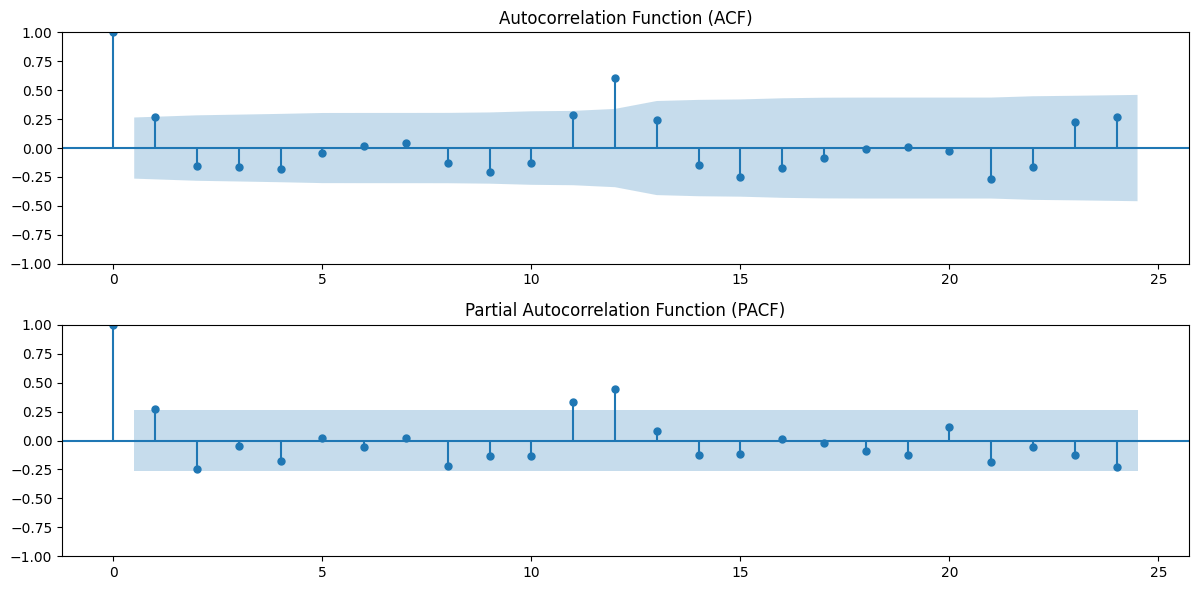

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calculate the ACF and PACF with fft=True for better accuracy
acf_values = acf(df["sales"], nlags=24, fft=False)
pacf_values = pacf(df["sales"], nlags=24)

# # Print ACF and PACF values within the expected range
print("ACF values are : ")
for i in range(0, 24):
    print(i, acf_values[i])

print("PACF values are : ")
for i in range(0, 24):
    print(i, pacf_values[i])

# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(df["sales"], lags=24, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(2, 1, 2)
plot_pacf(df["sales"], lags=24, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [8]:
print(pacf_values)

[ 1.          0.27494604 -0.25849171 -0.05270271 -0.18931364  0.02255093
 -0.06762778  0.02225071 -0.25839607 -0.16329952 -0.17207459  0.43140764
  0.65727051  0.32820736 -0.27439514 -0.6821063  -0.71997734 -0.03041172
  1.9034916  -0.53438024  2.34302463  0.59653071 -0.22315936 -0.71512092
 -1.33653057]


In [9]:
print(acf_values)

[ 1.          0.26994702 -0.15741541 -0.16361894 -0.18139534 -0.04421775
  0.01730016  0.0412715  -0.1304575  -0.21031822 -0.12621487  0.28364358
  0.60360701  0.24063027 -0.14991957 -0.24740759 -0.17389746 -0.08345239
 -0.00682053  0.00863811 -0.02385159 -0.26913216 -0.1618075   0.22099852
  0.2726809 ]


In [10]:
print(pacf_values)

[ 1.          0.27494604 -0.25849171 -0.05270271 -0.18931364  0.02255093
 -0.06762778  0.02225071 -0.25839607 -0.16329952 -0.17207459  0.43140764
  0.65727051  0.32820736 -0.27439514 -0.6821063  -0.71997734 -0.03041172
  1.9034916  -0.53438024  2.34302463  0.59653071 -0.22315936 -0.71512092
 -1.33653057]


In [11]:
#ACF values
print(f"ACF values are : /n{acf_values}")

ACF values are : /n[ 1.          0.26994702 -0.15741541 -0.16361894 -0.18139534 -0.04421775
  0.01730016  0.0412715  -0.1304575  -0.21031822 -0.12621487  0.28364358
  0.60360701  0.24063027 -0.14991957 -0.24740759 -0.17389746 -0.08345239
 -0.00682053  0.00863811 -0.02385159 -0.26913216 -0.1618075   0.22099852
  0.2726809 ]


In [12]:
#PACF values
print(f"PACF values are : /n{pacf_values}")

PACF values are : /n[ 1.          0.27494604 -0.25849171 -0.05270271 -0.18931364  0.02255093
 -0.06762778  0.02225071 -0.25839607 -0.16329952 -0.17207459  0.43140764
  0.65727051  0.32820736 -0.27439514 -0.6821063  -0.71997734 -0.03041172
  1.9034916  -0.53438024  2.34302463  0.59653071 -0.22315936 -0.71512092
 -1.33653057]


In [ ]:
acf=[]
for i in range(len(acf_values)):
    acf.append(acf_values[i])

In [ ]:
pacf=[]
for i in range(len(pacf_values)):
    pacf.append(pacf_values[i])

In [ ]:
pacf

In [ ]:
# Feature Engineering Dynamically
acf_features=[]
pacf_features=[]
for i in range (1,len(acf_values)):
    if abs(acf_values[i]>0.2):
        index = i
        lag = f"lag_{index}"
        acf_features.append(lag)

for i in range (1,len(pacf_values)):
    if abs(pacf_values[i]>0.2):
        index = i
        lag = f"lag_{index}"
        pacf_features.append(lag)
        
merge = list(set(acf_features+pacf_features))
merge.sort()
print(merge)


In [ ]:
df

In [ ]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter

In [ ]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter

# Implementic dynamic lags from ACF and PACF
for i in range (len(merge)):
   df[merge[i]]=df["sales"].shift(int(merge[i].split('_')[1]))

df["rolling_mean_3"] = df["sales"].rolling(window=3).mean()
df["rolling_mean_6"] = df["sales"].rolling(window=6).mean() 


df.dropna(inplace=True)

In [ ]:
df["year"]=df.index.year
df["month"]=df.index.month
df["quarter"]=df.index.quarter

for i in range (len(merge)):
    df[merge[i]]=df["sales"].shift(int(merge[i].split('_')[1]))

df["rolling_mean_3"]=df["sales"].rolling(window=3).mean()
df["rolling_mean_6"]=df["sales"].rolling(window=6).mean()

In [ ]:
df["year"]=df.index.year
df['month']=df.index.month
df['quarter']=df.index.mean

In [ ]:
df.index[-1]

In [ ]:
df

In [ ]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train.drop(columns=["sales"]), train["sales"]
X_test, y_test = test.drop(columns=["sales"]), test["sales"]

In [ ]:
# Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [ ]:
from sklearn.model_selection import GridSearchCV




# Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 250, 500],  
    "max_depth": [3, 7, 10],  
    "min_samples_split": [5, 10, 15],  
    "min_samples_leaf": [3, 5, 10]  
}





In [ ]:
#Hyperparameter Tuning and cross-validation using Grid Search Technique
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=True)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, "random_forest_model.pkl")

In [ ]:
# Load the trained model
rf_model = joblib.load("random_forest_model.pkl")

In [ ]:

yran_pred_scaled = rf_model.predict(X_test_scaled)
yran_pred = scaler_y.inverse_transform(yran_pred_scaled.reshape(-1, 1)).flatten()

In [ ]:
# # Random Forest Model
# rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42, n_jobs=-1, verbose=1)
# rf_model.fit(X_train_scaled, y_train_scaled)
# yran_pred_scaled = rf_model.predict(X_test_scaled)
# yran_pred = scaler_y.inverse_transform(yran_pred_scaled.reshape(-1, 1)).flatten()

In [ ]:
# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, yran_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, yran_pred))
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

In [ ]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, yran_pred)
print(f"Random Forest R² Score: {r2_rf:.4f}")


In [ ]:
X_test

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['sales'], label="Actual Data", color="black", linewidth=1, marker='o')
plt.plot(test.index, yran_pred, label="Random Forest Forecast", color="red", linestyle="dashed", linewidth=3, marker='o')
plt.title("Random Forest of company 06 from 2077-2081")
plt.xlabel("Years")
plt.ylabel("Monthly Sales")
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Actual Data Line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['sales'],
    mode='lines+markers',
    name='Actual Data',
    line=dict(color='black', width=1),
    marker=dict(symbol='circle', size=6),
    hovertemplate='Month: %{x}<br>Sales: %{y}<extra></extra>'
))

# Random Forest Forecast Line
fig.add_trace(go.Scatter(
    x=test.index,
    y=yran_pred,
    mode='lines+markers',
    name='Random Forest Forecast',
    line=dict(color='red', dash='dash', width=3),
    marker=dict(symbol='circle', size=6),
    hovertemplate='Month: %{x}<br>Sales: %{y}<extra></extra>'
))

# Add titles and labels
fig.update_layout(
    title='Random Forest of company 01 from 2077-2081',
    xaxis_title='Years',
    yaxis_title='Monthly Sales',
    legend_title='Legend',
    hovermode='x unified',
    width=1000,
    height=600
)

# Show figure
fig.show()


In [ ]:
df.index